In [1]:
#openpyxl installieren
!pip install openpyxl

#Datensatz einlesen
import pandas as pd
data = pd.read_excel('../src/data/external/Dry_Bean_Dataset.xlsx', engine='openpyxl')

In [2]:
#Daten zeigen
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
#Klassen anzeigen
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [4]:
#Daten vereinfachen: Entweder Barbunya-Bohne oder nicht
data['Class'] = data['Class']=='BARBUNYA'

#Klassen erneut anzeigen
data['Class'].value_counts()

False    12289
True      1322
Name: Class, dtype: int64

In [5]:
#Date vereinfachen: Spalten löschen

cols_to_keep = [7,12,13,14,16]
data = data.iloc[:,cols_to_keep]
data

,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3,Class
0,190.141097,0.007332,0.003147,0.834222,False
1,191.272750,0.006979,0.003564,0.909851,False
2,193.410904,0.007244,0.003048,0.825871,False
3,195.467062,0.007017,0.003215,0.861794,False
4,195.896503,0.006697,0.003665,0.941900,False
...,...,...,...,...,...
13606,231.515799,0.006858,0.001749,0.642988,False
13607,231.526798,0.006688,0.001886,0.676099,False
13608,231.631261,0.006681,0.001888,0.676884,False
13609,231.653248,0.006724,0.001852,0.668237,False


In [6]:
#Vorhersagendes Label festlegen
labels = data['Class']

data = data.drop(columns=['Class'])

In [7]:
#Daten skalieren
from sklearn import preprocessing

In [8]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)
X

array([[-1.0633406 ,  0.68078638,  2.40217287,  1.92572347],
       [-1.04421674,  0.3679669 ,  3.10089314,  2.68970162],
       [-1.00808399,  0.60312889,  2.23509147,  1.84135576],
       ...,
       [-0.3621965 ,  0.10426946,  0.28920441,  0.33632829],
       [-0.36182496,  0.14190638,  0.22837538,  0.2489734 ],
       [-0.3612677 ,  0.38751213, -0.12777587, -0.2764814 ]])

In [9]:
#Label als nump array in Variable schreiben
y = labels.values
y

array([False, False, False, ..., False, False, False])

In [10]:
#Neares-Neighbors-Modell mit Daten trainieren
from sklearn.neighbors import  KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier()

In [11]:
#Klassen vorhersagen
all_predictions = model.predict(X)
prediction_comparison = (all_predictions==labels)
prediction_comparison.value_counts(normalize=True)

True     0.962824
False    0.037176
Name: Class, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

len(X_train)/len(X)

0.7999412240099919

In [13]:
#Anteil der Barbunya-Bohnen im Training-Set bestimmen
pd.Series(y_train).value_counts(normalize=True)

False    0.902186
True     0.097814
dtype: float64

In [14]:
#Anteil der Barbunya-Bohnen im Testing-Set bestimmen
pd.Series(y_test).value_counts(normalize=True)

False    0.905619
True     0.094381
dtype: float64

In [15]:
#Zufälliges Train-Tets-Splitting  mit Stratifikation durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
#Anteil der Barbunya-Bohnen im Training-Set bestimmen
pd.Series(y_train).value_counts(normalize=True)

False    0.902829
True     0.097171
dtype: float64

In [17]:
#Anteil der Barbunya-Bohnen im Testing-Set bestimmen
pd.Series(y_test).value_counts(normalize=True)

False    0.903048
True     0.096952
dtype: float64

In [18]:
#F18 1. test_size=0,3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)
len(X_train2)/len(X)

0.699948571008743

In [19]:
#F18 2. 3687
pd.Series(y_test2).value_counts()

False    3687
True      397
dtype: int64

In [20]:
#F18 3. Xtest[Zeilen, alle Spalten]
keine_barb_bohne = y_test2 == False
X_test2[keine_barb_bohne,:]

array([[-1.13601971,  1.17000785,  1.77596711,  1.12849941],
       [-0.25272225, -0.14492848,  0.34873326,  0.55017836],
       [-0.76306661,  0.93349344,  0.41557203,  0.02917412],
       ...,
       [ 0.91244452, -0.88794923, -1.10114139, -0.8869347 ],
       [-0.07345716, -0.17547611, -0.12354349,  0.03164898],
       [-1.34178583,  2.17055997,  1.2070527 ,  0.18456653]])

In [21]:
#modell mit gesplitteten Daten trainieren
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#Vorhersagen für Test-Set amchen
y_predicted_test = model.predict(X_test)

In [23]:
#Korrekte Vorhersagen identifizieren nicht nötig
y_prediction_correct = y_predicted_test==y_test

In [24]:
#Neuen DatenFrame mit korrekten Vorhersagen
#und tatsächlichen Werten erstellen

predictions_and_labels = pd.DataFrame   ({'prediction':y_predicted_test,
                                       'label':y_test})
predictions_and_labels

,prediction,label
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2718,False,False
2719,False,False
2720,False,False
2721,False,False


In [25]:
pd.crosstab(predictions_and_labels['label'],
            predictions_and_labels['prediction'],
            predictions_and_labels['prediction'],
            aggfunc='count')

prediction,False,True
label,,
False,2410,49
True,84,180


C:\Users\Lukas\anaconda3\envs\biz_analytics_a\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


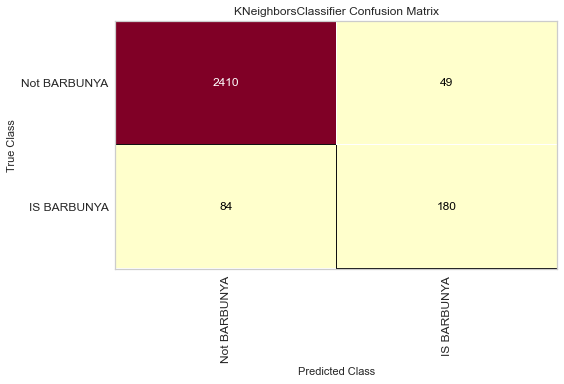

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
#Confusion Matrix mit Yellowbrick plotten
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix = ConfusionMatrix(
    model,
    classes=['Not BARBUNYA','IS BARBUNYA']
)
confusion_matrix.score(X_test,y_test)
confusion_matrix.show()

In [27]:
#Confusion Matrix zum Verständnis in Variablen abbilden
tp = 180
tn = 2410
fp = 49
fn =81

#Accuracy manuell berechnen
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9522058823529411

In [28]:
#Accuracy mit scikit-learn berechnen
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predicted_test)

0.9511568123393316

In [33]:
#F30 Aufgabe

recall = (tp)/(tp+fn)
recall

0.6896551724137931

In [30]:
from sklearn.metrics import recall_score

recall_score(y_test,y_predicted_test)

0.6818181818181818

In [31]:
precision = tp/(tp+fp)
precision

0.7860262008733624

In [32]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predicted_test)

0.7860262008733624

In [34]:
#Klassifikations-Report aus scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2459
        True       0.79      0.68      0.73       264

    accuracy                           0.95      2723
   macro avg       0.88      0.83      0.85      2723
weighted avg       0.95      0.95      0.95      2723



In [35]:
# F1-Score manuell implementieren
f1 = 2*precision*recall/(precision+recall)
f1

0.7346938775510203

In [36]:
#F1-Sore mit scikit-learn berechnen
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted_test)

0.7302231237322515

In [38]:
#Lade Entscheidungsbaummodell aus scikit-learn
#und modelliere mit Trainings-Daten
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(465.0, 545.015625, 'ShapeFactor1 <= -0.519\ngini = 0.175\nsamples = 10888\nvalue = [9830, 1058]\nclass = Not BARBUNYA'),
 Text(232.5, 389.296875, 'ShapeFactor2 <= -0.908\ngini = 0.443\nsamples = 2917\nvalue = [1951, 966]\nclass = Not BARBUNYA'),
 Text(116.25, 233.578125, 'ShapeFactor2 <= -1.032\ngini = 0.17\nsamples = 1537\nvalue = [1393, 144]\nclass = Not BARBUNYA'),
 Text(58.125, 77.859375, '\n  (...)  \n'),
 Text(174.375, 77.859375, '\n  (...)  \n'),
 Text(348.75, 233.578125, 'EquivDiameter <= 0.172\ngini = 0.482\nsamples = 1380\nvalue = [558, 822]\nclass = IS BARBUNYA'),
 Text(290.625, 77.859375, '\n  (...)  \n'),
 Text(406.875, 77.859375, '\n  (...)  \n'),
 Text(697.5, 389.296875, 'ShapeFactor1 <= -0.235\ngini = 0.023\nsamples = 7971\nvalue = [7879, 92]\nclass = Not BARBUNYA'),
 Text(581.25, 233.578125, 'ShapeFactor3 <= 0.764\ngini = 0.151\nsamples = 814\nvalue = [747, 67]\nclass = Not BARBUNYA'),
 Text(523.125, 77.859375, '\n  (...)  \n'),
 Text(639.375, 77.859375, '\n  (..

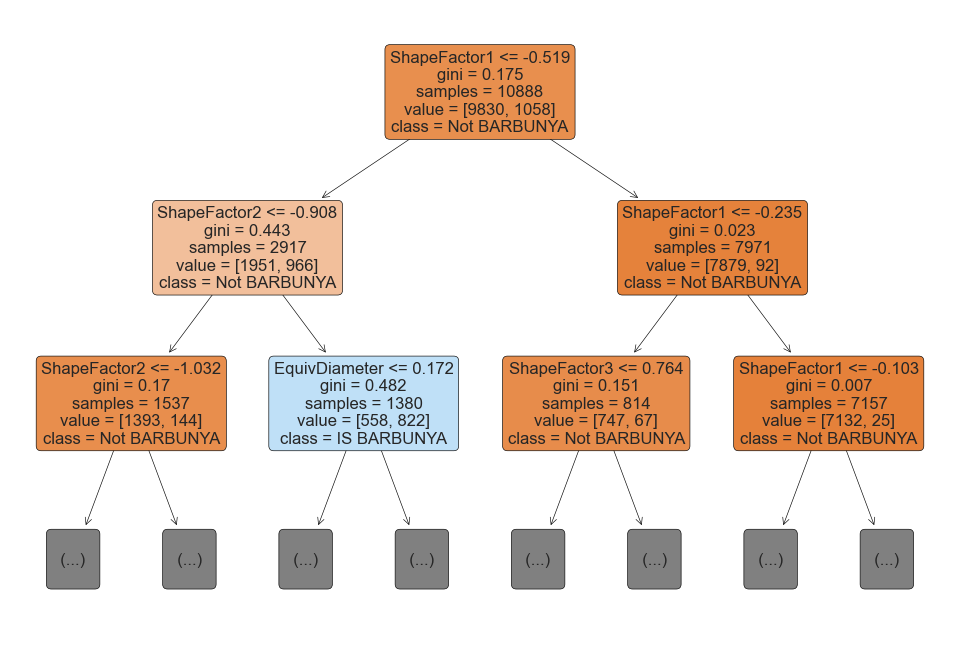

In [41]:
#Plotte die ersten Benen des Enstcheidungsbaummodells
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(dpi=150)
plot_tree(model_dt,
          max_depth=2,
          feature_names=data.columns,
          class_names=['Not BARBUNYA','IS BARBUNYA'],
          rounded=True,
          filled=True,
          fontsize=8)

In [42]:
#Entscheidungsbaummodell auswerten
y_predicted_test_dt = model_dt.predict(X_test)
print(classification_report(y_test,y_predicted_test_dt))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      2459
        True       0.65      0.66      0.66       264

    accuracy                           0.93      2723
   macro avg       0.81      0.81      0.81      2723
weighted avg       0.93      0.93      0.93      2723



In [56]:
#Random Forest Model trainieren und auswerten
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_predicted_test_rf = model_rf.predict(X_test)

#Classification-report
print(classification_report(y_test,y_predicted_test_rf))


              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2459
        True       0.78      0.70      0.74       264

    accuracy                           0.95      2723
   macro avg       0.88      0.84      0.86      2723
weighted avg       0.95      0.95      0.95      2723



In [57]:
#Wichtigkeit der Spalten im Modell anzeigen
model_rf.feature_importances_

array([0.22479934, 0.26372815, 0.30641811, 0.20505441])

In [58]:
pd.Series(model_rf.feature_importances_,
    index=data.columns)

EquivDiameter    0.224799
ShapeFactor1     0.263728
ShapeFactor2     0.306418
ShapeFactor3     0.205054
dtype: float64

In [59]:
pd.Series(model_rf.feature_importances_,
    index=data.columns).sort_values(ascending=False)

ShapeFactor2     0.306418
ShapeFactor1     0.263728
EquivDiameter    0.224799
ShapeFactor3     0.205054
dtype: float64

In [61]:
#Stratifizierte Kreuzvalidierung definieren
from sklearn.model_selection import  StratifiedKFold

cv_splitter = StratifiedKFold(shuffle=True, random_state=42)
splits = cv_splitter.split(X,y)
for train_index, test_index in splits:
    print('Zeilen in Training und Testing: ', len(train_index), len(test_index))

Zeilen in Training und Testing:  10888 2723
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722


In [63]:
#Random Forest Modell kreuzvalidieren
from sklearn.model_selection import cross_validate

model = RandomForestClassifier()
scores = cross_validate(model, X, y,
                        cv = cv_splitter,
                        scoring=['f1','precision','recall'])
scores

{'fit_time': array([0.89534616, 0.85223246, 0.80910373, 0.81413293, 0.8161912 ]),
 'score_time': array([0.02105546, 0.02006841, 0.02006817, 0.02005243, 0.01899648]),
 'test_f1': array([0.74493927, 0.7251462 , 0.71370968, 0.72654691, 0.72131148]),
 'test_precision': array([0.80349345, 0.74698795, 0.76293103, 0.76793249, 0.78923767]),
 'test_recall': array([0.69433962, 0.70454545, 0.67045455, 0.68939394, 0.66415094])}

In [67]:
#durchschnittlichen F1-Score aus den Folds berechnen
scores['test_f1'].mean()

0.7263307058204572

In [192]:
#max_depth-parameter fetslegen und auswerten
model = RandomForestClassifier(random_state=42, max_depth=7, n_estimators=200,min_samples_split=130,min_samples_leaf=8,max_features=1,max_leaf_nodes=35,)
scores = cross_validate(model, X, y,
                        cv = cv_splitter,
                        scoring=['f1','precision','recall'],
                        return_train_score=True)
print('Test: ',scores['test_f1'].mean().round(3), 'Train: ',scores['train_f1'].mean().round(3))

Test:  0.754 Train:  0.765


<bound method Visualizer.show of ValidationCurve(ax=<AxesSubplot:>,
                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                estimator=RandomForestClassifier(max_depth=7, max_features=1,
                                                 max_leaf_nodes=35,
                                                 min_samples_leaf=8,
                                                 min_samples_split=130,
                                                 n_estimators=200,
                                                 random_state=42),
                param_name='max_depth',
                param_range=array([1, 2, 3, 4, 5, 6, 7, 8, 9]), scoring='f1')>

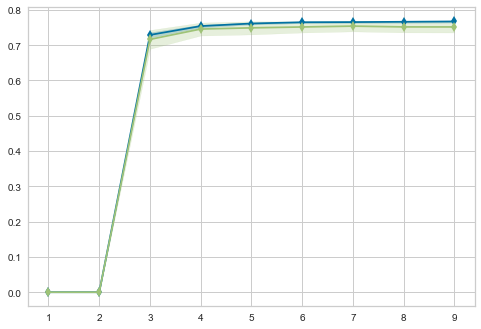

In [194]:
#Einfluss des max_depth Parameters plotten
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    model,
    param_name='max_depth',
    param_range=range(1,10),
    cv=cv_splitter,
    scoring='f1'
)
viz.fit(X,y)
viz.show